In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/2월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.187500,0.205357,0.913043,0.165358,1.818706,1.056641,11.621466,6.751901
1,중랑구,(구)신한은행 중랑교지점,1,0.080357,0.160714,0.500000,0.032258,0.838710,0.354839,10.785185,4.562963
2,중랑구,(구)신한은행 중랑교지점,2,0.053571,0.133929,0.400000,0.015519,0.614937,0.221145,11.659770,4.193103
3,중랑구,(구)신한은행 중랑교지점,3,0.062500,0.035714,1.750000,0.456377,2.991066,2.039726,88.033566,60.033566
4,중랑구,(구)신한은행 중랑교지점,4,0.035714,0.071429,0.500000,0.032258,0.838710,0.354839,24.266667,10.266667
...,...,...,...,...,...,...,...,...,...,...,...
54787,강서구,힐스테이트에코,19,0.687500,1.000000,0.687500,0.053663,1.491643,0.841036,2.292696,1.292696
54788,강서구,힐스테이트에코,20,0.428571,0.633929,0.676056,0.050578,1.453628,0.811766,3.572490,1.995025
54789,강서구,힐스테이트에코,21,0.348214,0.500000,0.696429,0.056138,1.521397,0.864064,4.629002,2.629002
54790,강서구,힐스테이트에코,22,0.357143,0.383929,0.930233,0.138045,2.289742,1.487923,7.438065,4.833413


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.187500,0.205357,0.913043,1.818706,11.621466
1,중랑구,(구)신한은행 중랑교지점,1,0.080357,0.160714,0.500000,0.838710,10.785185
2,중랑구,(구)신한은행 중랑교지점,2,0.053571,0.133929,0.400000,0.614937,11.659770
3,중랑구,(구)신한은행 중랑교지점,3,0.062500,0.035714,1.750000,2.991066,88.033566
4,중랑구,(구)신한은행 중랑교지점,4,0.035714,0.071429,0.500000,0.838710,24.266667


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.113726,0.177868,0.139869,0.25196,0.211401,0.259536,0.190533,0.119632,0.258557,0.163915,0.210648,0.171899,0.260852,0.147407,0.138527,0.252998,0.181446,0.209117,0.267611,0.353293,0.134794,0.165505,0.164494,0.125122,0.172436


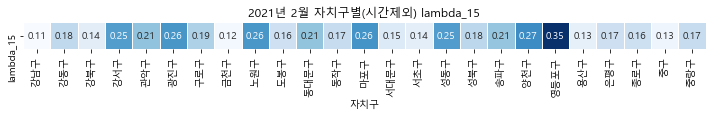

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.166871,0.241617,0.160403,0.333121,0.347029,0.555541,0.290514,0.19442,0.284354,0.196817,0.240768,0.236129,0.404397,0.190423,0.261553,0.432172,0.232914,0.305813,0.329155,0.55838,0.2265,0.257306,0.200756,0.166337,0.205839


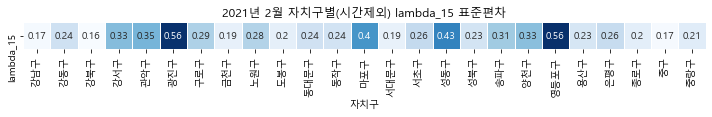

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.116895,0.175648,0.141595,0.252159,0.217897,0.253464,0.190697,0.121559,0.258891,0.165031,0.210064,0.172654,0.255577,0.154732,0.137735,0.250166,0.184582,0.206808,0.265928,0.348986,0.131423,0.164788,0.171345,0.131075,0.171721


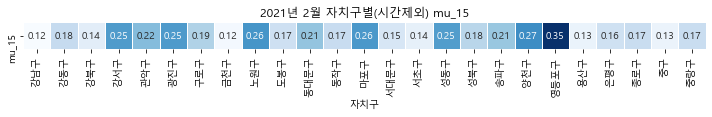

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.156144,0.227177,0.157232,0.319151,0.326742,0.45596,0.284899,0.186637,0.273224,0.188123,0.234696,0.208901,0.365297,0.177881,0.23481,0.398246,0.218466,0.298008,0.304318,0.511401,0.208401,0.231503,0.201304,0.16552,0.188493


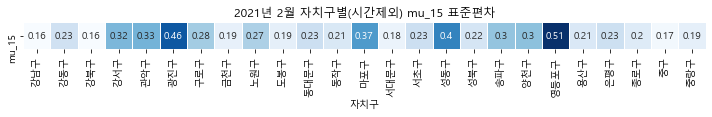

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.048572,1.154982,1.097443,1.244455,1.042341,1.010312,1.218313,1.336229,1.202641,1.18811,1.232509,1.119344,1.232232,1.151751,0.994125,1.138445,1.053797,1.145894,1.18467,1.375654,1.058857,1.117446,1.062301,1.031327,1.064016


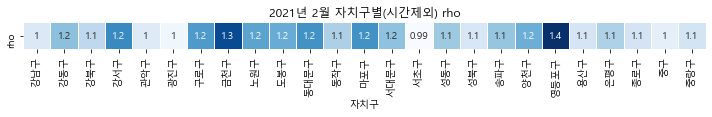

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.438654,0.865202,0.589473,1.322724,1.026654,1.502298,0.90313,0.441287,1.413282,0.818916,1.076306,0.828243,1.457996,0.653466,0.676241,1.368391,0.877648,1.096818,1.546259,2.031648,0.651451,0.827866,0.817999,0.547596,0.853264


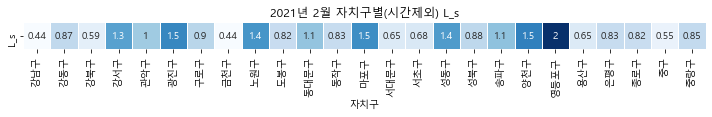

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.702735,1.239881,0.76379,1.694129,1.811366,3.983947,1.400557,0.697884,1.440392,1.033885,1.215377,1.211486,2.348772,0.894268,1.401815,2.305475,1.115465,1.648257,1.882588,3.241503,1.229611,1.478638,0.975441,0.735209,0.987047


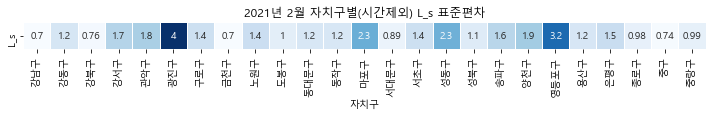

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,11.590176,15.400545,11.426347,21.445243,12.748762,16.182626,17.594133,12.773144,21.809081,17.357392,20.155916,14.484539,24.008335,14.437898,14.841085,21.840967,15.513721,20.66788,25.893469,32.920178,14.580479,13.752578,18.736229,13.453916,15.198184


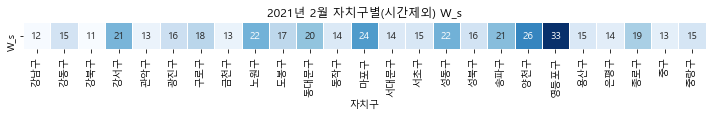

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,36.811665,43.270944,26.082067,60.728306,28.553692,54.581122,53.35842,35.936309,54.077207,39.49079,46.463753,43.39921,69.674769,35.373849,50.179247,77.387656,41.190062,74.451495,79.894374,123.20184,48.436223,43.034065,52.198851,34.667062,38.200172


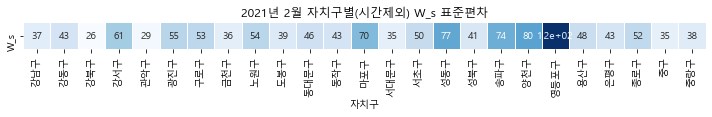

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.042081  0.039739  0.034031  0.023200  0.013100  0.009587  0.017052   
강동구  0.088795  0.065051  0.046900  0.020997  0.021389  0.025314  0.050726   
강북구  0.102605  0.073478  0.059573  0.042008  0.032933  0.027664  0.031909   
강서구  0.094745  0.062102  0.042425  0.029345  0.021156  0.032757  0.065514   
관악구  0.139560  0.105907  0.073489  0.044780  0.026786  0.029670  0.051648   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.061695  0.128732  0.103923  0.084236  0.101215  0.135539  0.153615   
강동구  0.084870  0.181711  0.130789  0.127355  0.145899  0.186715  0.233909   
강북구  0.060012  0.136270  0.089432  0.098946  0.122219  0.156909  0.185158   
강서구  0.159406  0.380858  0.227138  0.188865  0.225091  0.305050  0.331551   
관악구  0.085302  0.199863  0.146429  0.137225  0.172390  0.215659  0.251786   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.169496  0.199576  0.234412  0.274005  0.290105  0.194306  0.134368   
강동구  0.242151  0.312500  0.325353  0.377159  0.436715  0.319172  0.253728   
강북구  0.204625  0.239900  0.261270  0.267711  0.306352  0.223361  0.177400   
강서구  0.344404  0.385692  0.447680  0.548510  0.630971  0.453651  0.328594   
관악구  0.285440  0.326099  0.378984  0.424588  0.514011  0.416071  0.298626   

                                   
시간         21        22        23  
자치구                                
강남구  0.128879  0.094409  0.062134  
강동구  0.259125  0.203395  0.129121  
강북구  0.190720  0.154420  0.111973  
강서구  0.337238  0.253981  0.150307  
관악구  0.314973  0.261126  0.173214

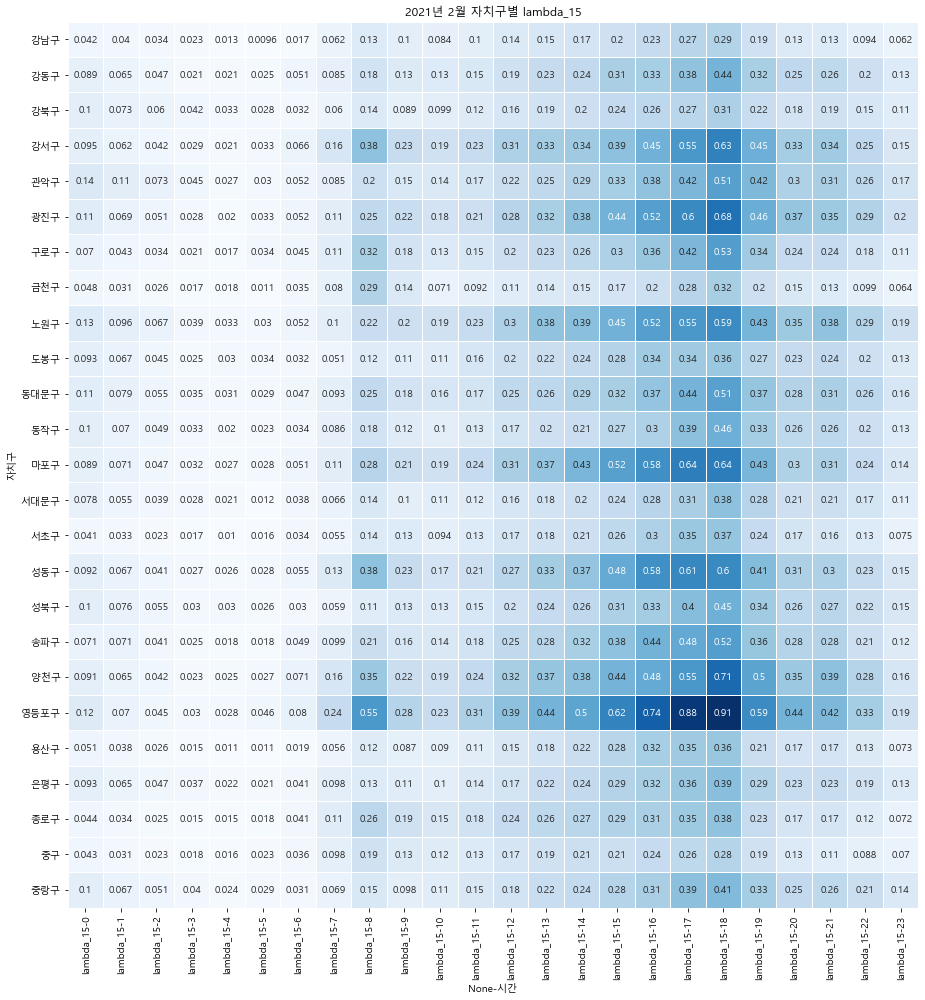

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.048654  0.041833  0.037326  0.029816  0.018480  0.024704  0.027574   
강동구  0.098425  0.075928  0.065362  0.030681  0.036277  0.049753  0.095599   
강북구  0.085230  0.063290  0.057673  0.050779  0.044926  0.042280  0.049510   
강서구  0.079292  0.064996  0.046982  0.033301  0.032340  0.053804  0.109900   
관악구  0.165627  0.123071  0.086418  0.066936  0.041400  0.055155  0.087175   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.091681  0.194882  0.131369  0.091660  0.084374  0.120026  0.138011   
강동구  0.142394  0.266642  0.161195  0.134607  0.135541  0.171640  0.216159   
강북구  0.079912  0.157473  0.089174  0.092189  0.116944  0.143604  0.154981   
강서구  0.307261  0.528028  0.281673  0.194702  0.219008  0.263283  0.294544   
관악구  0.148593  0.319410  0.184647  0.168335  0.190341  0.260503  0.305613   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.163293  0.213925  0.286103  0.292379  0.288437  0.180987  0.120965   
강동구  0.227580  0.307943  0.294240  0.357897  0.419427  0.320420  0.257333   
강북구  0.188054  0.199798  0.245311  0.232283  0.239870  0.174412  0.137265   
강서구  0.296636  0.330675  0.377841  0.504610  0.557013  0.376980  0.271694   
관악구  0.358660  0.425793  0.558252  0.562682  0.663403  0.481571  0.362780   

                                   
시간         21        22        23  
자치구                                
강남구  0.118044  0.098411  0.063305  
강동구  0.239889  0.200184  0.122070  
강북구  0.144733  0.120897  0.088817  
강서구  0.274189  0.220629  0.124954  
관악구  0.373524  0.326210  0.235868

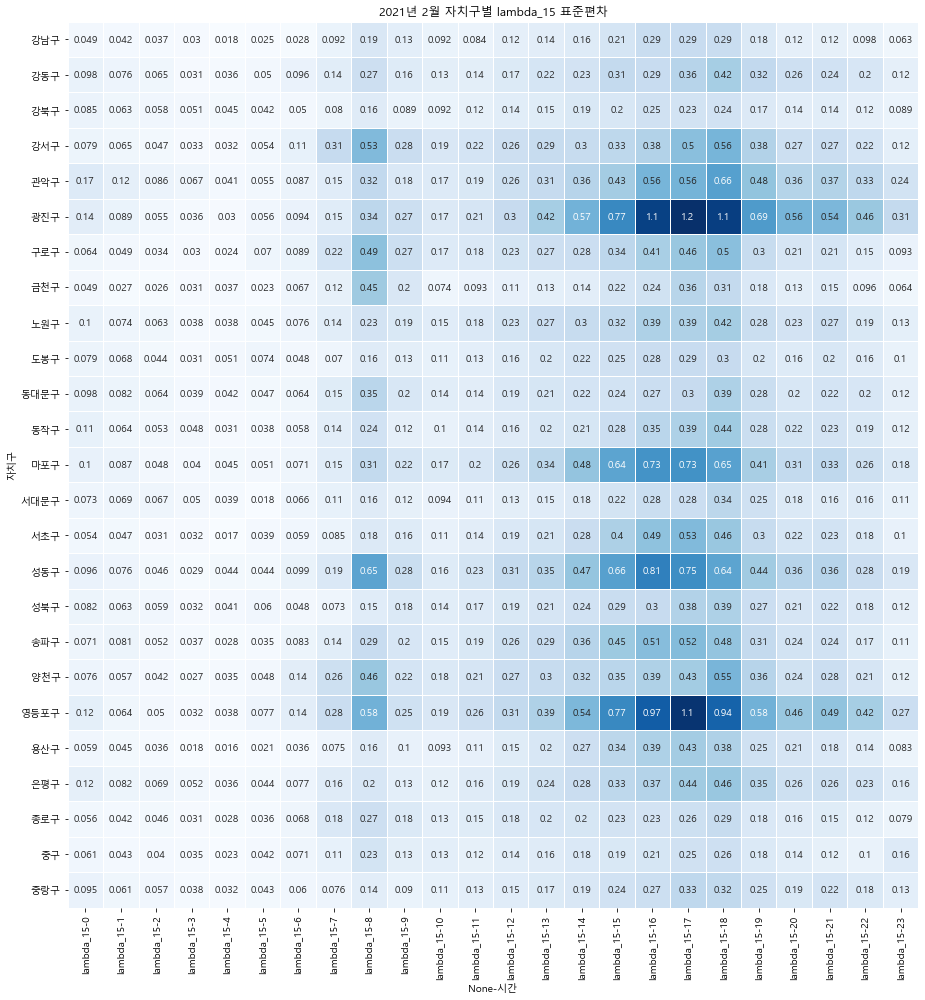

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.043106  0.032933  0.029420  0.018882  0.009221  0.009880  0.025029   
강동구  0.072017  0.054749  0.030612  0.022076  0.021586  0.029925  0.058379   
강북구  0.106411  0.057231  0.051376  0.032348  0.027810  0.026493  0.035861   
강서구  0.079902  0.051638  0.036852  0.027354  0.021497  0.038728  0.072452   
관악구  0.116758  0.094093  0.059341  0.043544  0.028022  0.036813  0.061813   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.053352  0.121853  0.097629  0.096531  0.124780  0.152518  0.166789   
강동구  0.107241  0.207025  0.152571  0.153159  0.179945  0.223705  0.266974   
강북구  0.068501  0.127488  0.110656  0.115047  0.140808  0.185012  0.215749   
강서구  0.187159  0.378583  0.231176  0.205812  0.263364  0.329732  0.360669   
관악구  0.135852  0.275137  0.176511  0.178571  0.211676  0.274725  0.306319   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.197526  0.227898  0.246414  0.279713  0.288861  0.172570  0.140954   
강동구  0.299647  0.339286  0.326236  0.345958  0.352433  0.261676  0.234301   
강북구  0.243852  0.264198  0.251317  0.262002  0.282787  0.198039  0.189403   
강서구  0.385976  0.420951  0.459622  0.551695  0.591561  0.394904  0.325125   
관악구  0.340522  0.385989  0.400824  0.387500  0.413462  0.348352  0.288462   

                                   
시간         21        22        23  
자치구                                
강남구  0.131953  0.085919  0.051742  
강동구  0.222037  0.153159  0.100863  
강북구  0.177840  0.129684  0.098361  
강서구  0.300159  0.216447  0.120450  
관악구  0.305220  0.222527  0.137500

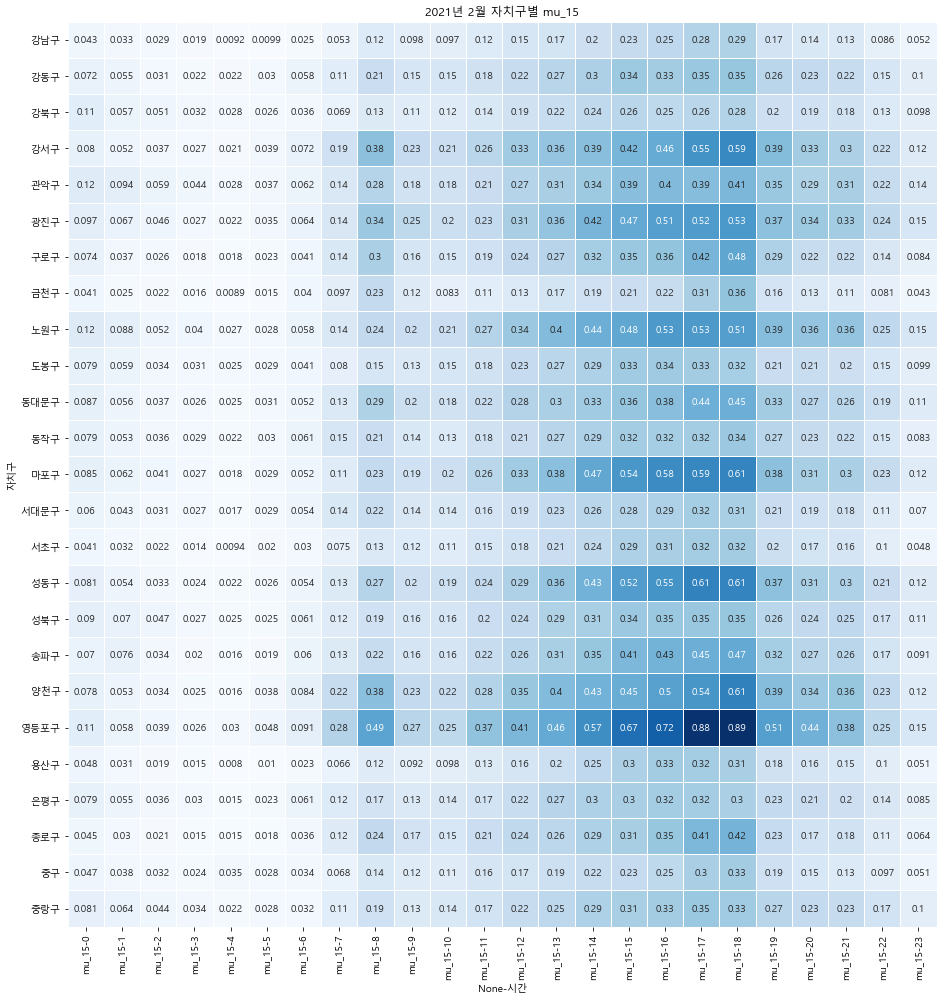

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.039974  0.028073  0.028896  0.025181  0.018184  0.021985  0.036780   
강동구  0.077253  0.063208  0.047937  0.030939  0.041647  0.053146  0.082235   
강북구  0.083667  0.050015  0.055007  0.040134  0.033768  0.034309  0.038765   
강서구  0.074041  0.055615  0.045602  0.032910  0.029282  0.058501  0.096142   
관악구  0.130282  0.122555  0.074358  0.064742  0.037380  0.047600  0.084029   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.070205  0.125751  0.087803  0.076869  0.096645  0.118549  0.133829   
강동구  0.114647  0.233045  0.163851  0.129544  0.157310  0.187511  0.243637   
강북구  0.068924  0.114830  0.083269  0.070324  0.108049  0.131961  0.144284   
강서구  0.201787  0.429256  0.214844  0.154455  0.192698  0.252338  0.271693   
관악구  0.185560  0.338594  0.192332  0.190106  0.209950  0.299660  0.332079   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.176961  0.209079  0.233438  0.264425  0.262098  0.163597  0.135827   
강동구  0.252830  0.313894  0.279617  0.316397  0.368522  0.269787  0.257224   
강북구  0.185566  0.213835  0.205550  0.218059  0.239804  0.184863  0.177513   
강서구  0.284748  0.329677  0.365340  0.472753  0.571534  0.397403  0.315371   
관악구  0.399927  0.416598  0.525152  0.470691  0.517065  0.421989  0.355447   

                                   
시간         21        22        23  
자치구                                
강남구  0.119710  0.077390  0.048074  
강동구  0.233782  0.155959  0.094730  
강북구  0.172064  0.109323  0.081122  
강서구  0.312993  0.205062  0.100262  
관악구  0.383402  0.331931  0.193881

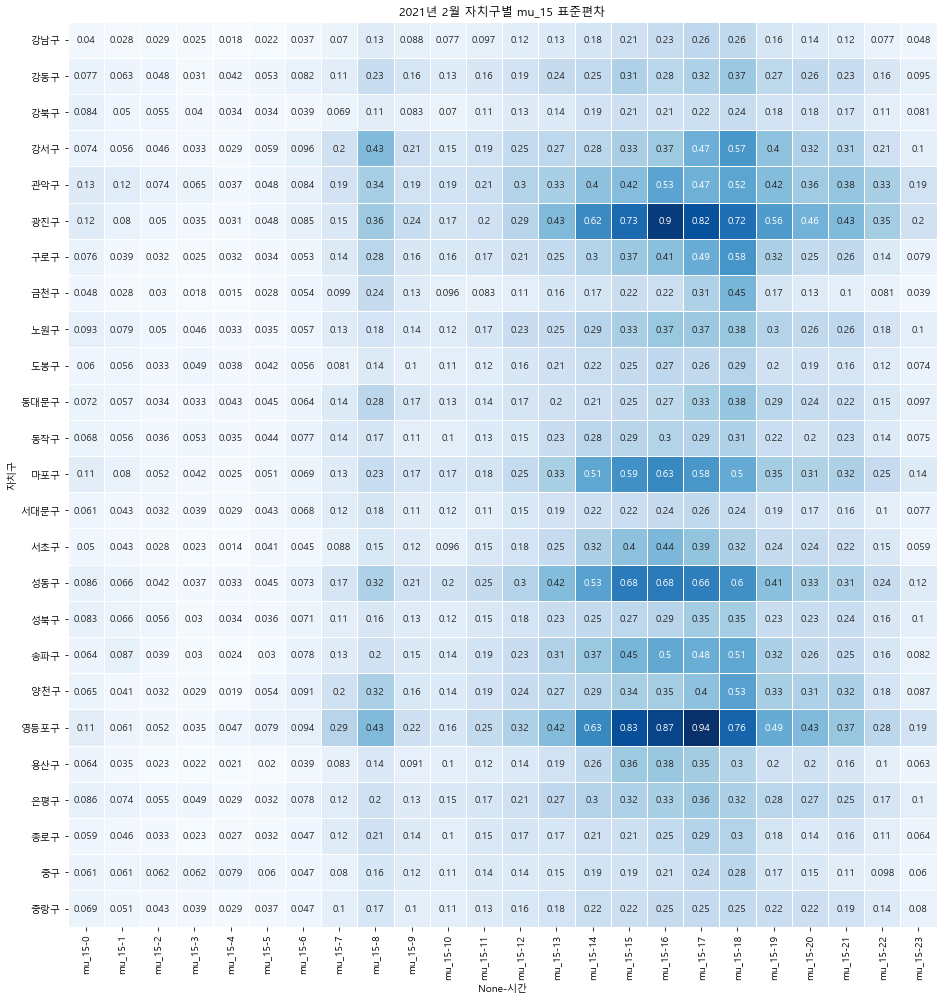

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.029537  1.432906  1.079882  0.884286  0.483581  0.373872  0.713583   
강동구  1.478070  1.145553  1.172049  0.704397  0.769154  0.780006  1.016370   
강북구  1.155452  1.519849  1.267668  1.268713  1.059273  1.032361  0.926314   
강서구  1.558030  1.482851  1.287907  1.095428  0.815210  1.062456  1.802233   
관악구  1.132484  1.499226  1.545653  0.975156  0.857507  0.804340  1.038820   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.915034  1.333519  1.478419  0.995225  0.846320  0.851222  0.900736   
강동구  2.130416  1.346283  1.007659  0.847897  1.013740  0.844700  0.862052   
강북구  0.965302  1.203397  0.885592  0.855607  0.801300  0.875739  0.761661   
강서구  1.758766  2.140461  1.333191  0.933580  0.831849  0.912653  0.914280   
관악구  1.156981  1.031198  1.023288  0.893560  0.897207  0.807946  0.767233   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.831709  0.917665  0.898146  1.021436  1.154872  1.266970  1.108019   
강동구  0.790820  0.876781  0.991211  1.153132  1.520073  1.444337  1.192624   
강북구  0.852400  0.908731  0.971618  0.996369  1.434404  1.287312  1.071169   
강서구  0.885770  0.873196  0.965002  1.013030  1.256908  1.396135  1.230953   
관악구  0.783131  0.776329  0.864613  0.979467  1.159494  1.198482  0.977626   

                                   
시간         21        22        23  
자치구                                
강남구  1.131784  1.199147  1.317851  
강동구  1.555393  1.615118  1.461725  
강북구  1.471066  1.335529  1.431795  
강서구  1.398297  1.419113  1.499609  
관악구  1.269436  1.314034  1.262972

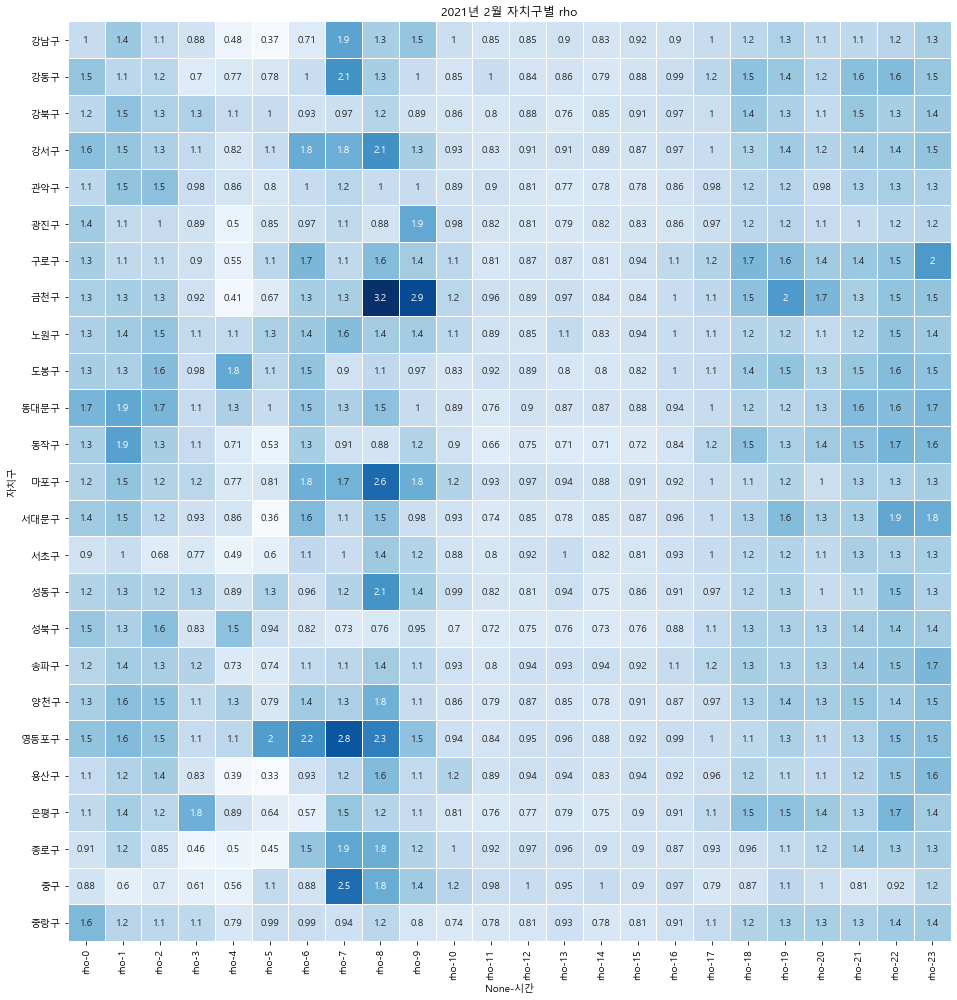

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.416885  0.536072  0.423703  0.333028  0.257933  0.145227  0.348169   
강동구  1.046811  0.938729  1.043642  0.749853  0.695584  0.634040  0.671465   
강북구  0.607245  0.682313  0.594168  0.571072  0.529575  0.450185  0.566287   
강서구  1.369328  1.435895  1.152505  1.067561  0.964342  1.059089  1.330601   
관악구  1.284743  1.219500  1.104463  1.023275  0.885466  0.872431  0.780730   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.492711  0.465622  0.427255  0.458198  0.433612  0.461908  0.473330   
강동구  0.741795  0.704431  0.757851  0.778421  0.751969  0.726196  0.790049   
강북구  0.559101  0.682597  0.544425  0.578075  0.569689  0.556037  0.574633   
강서구  1.139143  1.194917  1.281711  1.412423  1.278357  1.354876  1.381067   
관악구  0.726161  0.853031  0.974662  0.879414  0.836389  0.825757  0.882289   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.438375  0.454237  0.486544  0.504007  0.517811  0.510343  0.446016   
강동구  0.757395  0.854844  0.920373  0.977616  1.076833  1.060109  0.969621   
강북구  0.542320  0.569441  0.644960  0.610642  0.632309  0.627105  0.557270   
강서구  1.306584  1.318052  1.411949  1.532589  1.503379  1.504092  1.363289   
관악구  0.867955  0.967509  1.086666  1.261607  1.371068  1.295486  1.097291   

                                   
시간         21        22        23  
자치구                                
강남구  0.453458  0.516618  0.526622  
강동구  0.965961  1.086168  1.065091  
강북구  0.595326  0.656554  0.646026  
강서구  1.412744  1.461711  1.509167  
관악구  1.071750  1.173529  1.298522

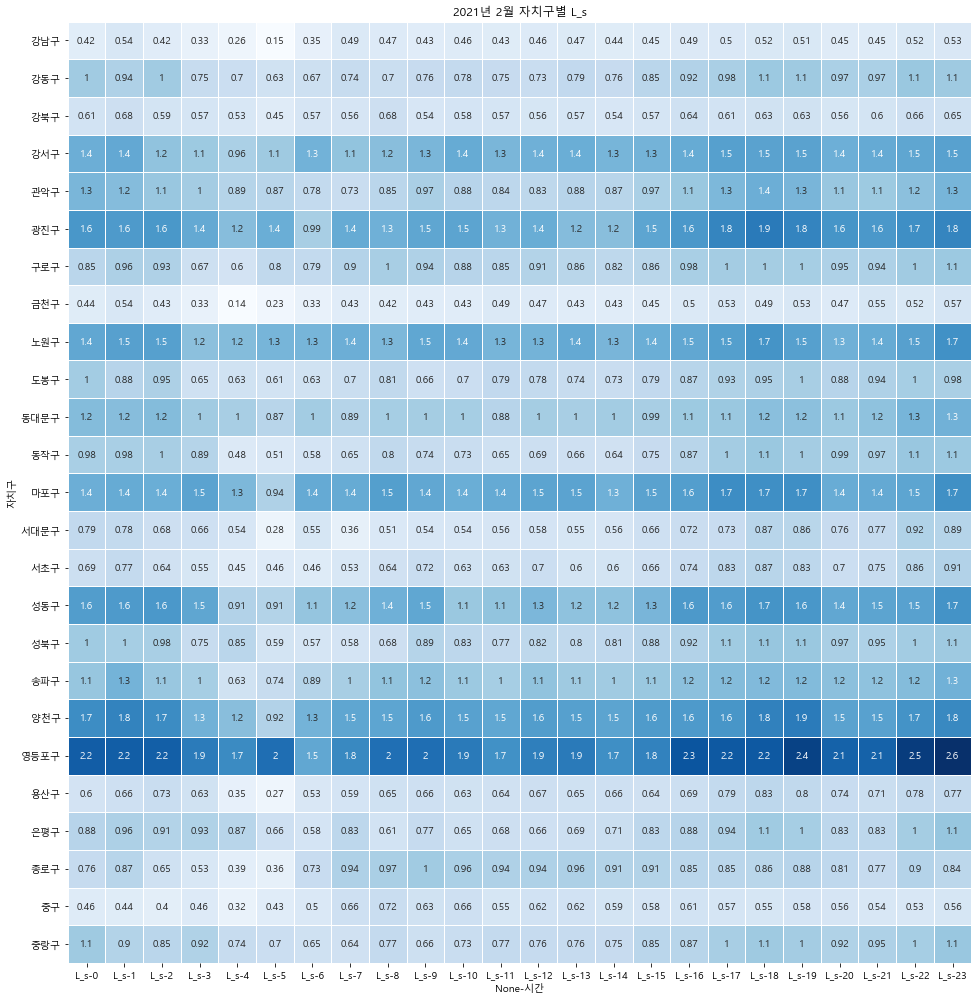

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.583831  0.902806  0.649952  0.600272  0.599736  0.431539  0.945579   
강동구  1.405949  1.414942  1.552724  1.362218  1.465562  1.401797  1.493062   
강북구  0.786979  0.826979  0.789728  0.706918  0.811821  0.920410  1.023700   
강서구  1.461341  1.833418  1.662881  1.641076  1.939445  2.237237  2.346606   
관악구  2.102251  1.964887  1.804050  1.949604  2.255007  2.457126  1.701706   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.969111  0.831439  0.581165  0.707628  0.559622  0.630615  0.602560   
강동구  1.166110  1.116561  1.078434  1.073753  0.931711  0.797814  0.900603   
강북구  0.914322  0.959811  0.779160  0.842874  0.683496  0.678120  0.713675   
강서구  2.018645  1.683572  1.761964  2.010988  1.707395  1.532052  1.588417   
관악구  1.556459  1.751196  1.668710  1.740154  1.106994  1.282659  1.323960   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.573610  0.648684  0.714880  0.719162  0.802723  0.676452  0.536213   
강동구  0.963664  0.974968  1.101285  1.210023  1.320814  1.353190  1.238818   
강북구  0.645437  0.640978  0.748788  0.710238  0.728979  0.691963  0.575756   
강서구  1.441412  1.338905  1.487300  1.743191  1.547216  1.423677  1.314585   
관악구  1.128494  1.775007  1.803598  2.094082  2.296130  2.122791  1.579340   

                                   
시간         21        22        23  
자치구                                
강남구  0.574739  0.781343  0.853184  
강동구  1.170447  1.404826  1.387619  
강북구  0.631875  0.694536  0.742454  
강서구  1.361671  1.482864  1.533488  
관악구  1.506047  1.772728  2.012103

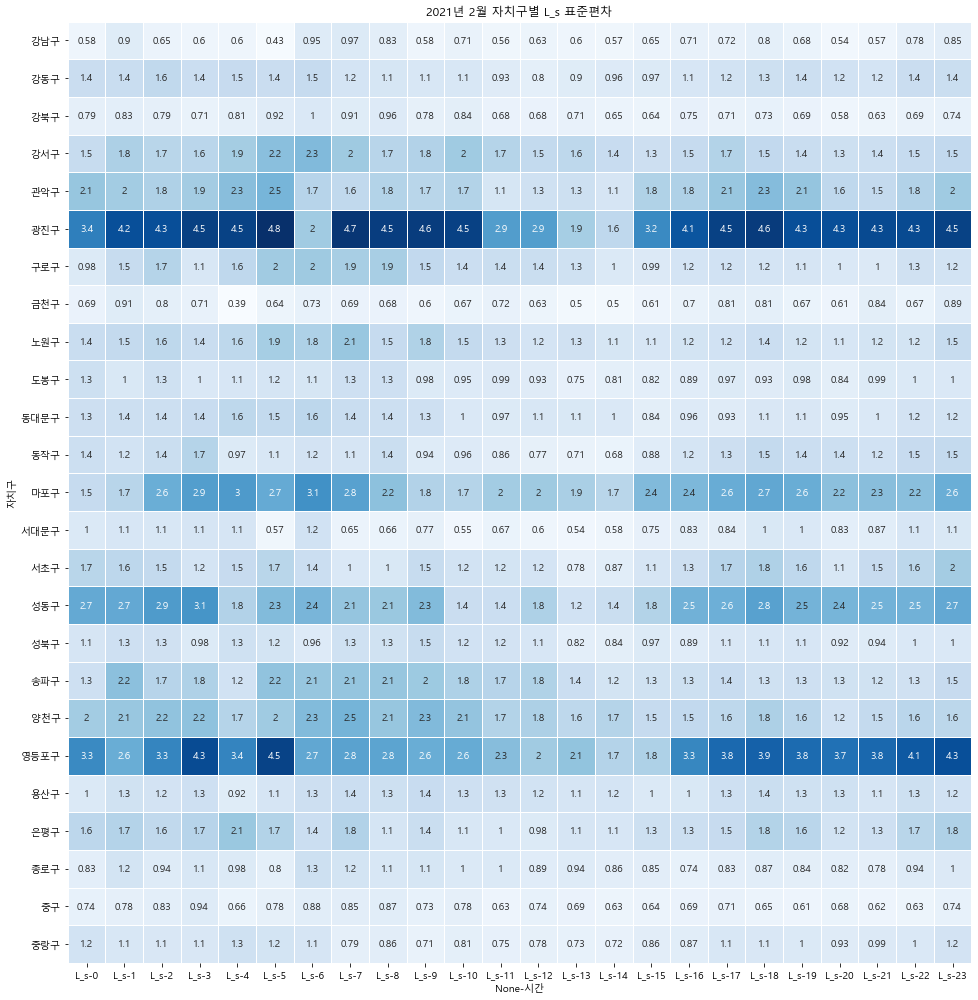

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구  18.331065  26.522686  23.548453  28.337746  25.327748  17.077927   
강동구  22.109753  25.146273  43.038004  41.998108  45.305318  43.462853   
강북구   9.082803  20.620498  20.815352  33.170137  33.995879  29.459875   
강서구  30.936657  55.606495  56.970843  65.489264  57.554272  59.998392   
관악구  12.499447  23.073656  34.675596  34.833869  33.566163  28.185873   

                                                                              \
시간          6          7          8         9         10        11        12   
자치구                                                                            
강남구  33.458234  26.361534   7.530932  6.916426  6.615191  5.092584  3.816735   
강동구  22.852588  26.339515   8.945466  9.056032  7.796944  6.145112  4.663662   
강북구  28.462243  14.266002  10.204113  7.398564  6.592473  5.934120  4.040997   
강서구  55.792879  18.106680   8.606683  9.425835  9.088849  6.414999  5.346792   
관악구  24.874330  21.862039   9.055932  9.239150  7.703804  6.117788  4.484808   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  3.432882  3.000772  2.555554  2.401475  2.264401  2.289056  3.492327   
강동구  4.102942  3.547616  3.279845  3.440754  3.552073  4.153265  4.859276   
강북구  3.255625  3.055171  2.894638  3.251243  2.938864  2.884781  4.266652   
강서구  4.900891  4.302384  4.100089  3.864523  3.523743  3.597449  5.584435   
관악구  4.082701  3.923925  3.406058  3.538937  3.665357  3.674478  4.064391   

                                               
시간         20        21         22         23  
자치구                                            
강남구  4.075436  4.411320   7.974165  13.329568  
강동구  5.613189  6.937802   9.523381  13.743313  
강북구  4.503262  5.527071   6.995378  10.616586  
강서구  7.451956  7.756910  10.972827  19.291995  
관악구  4.896337  5.169647   8.045804  11.330197

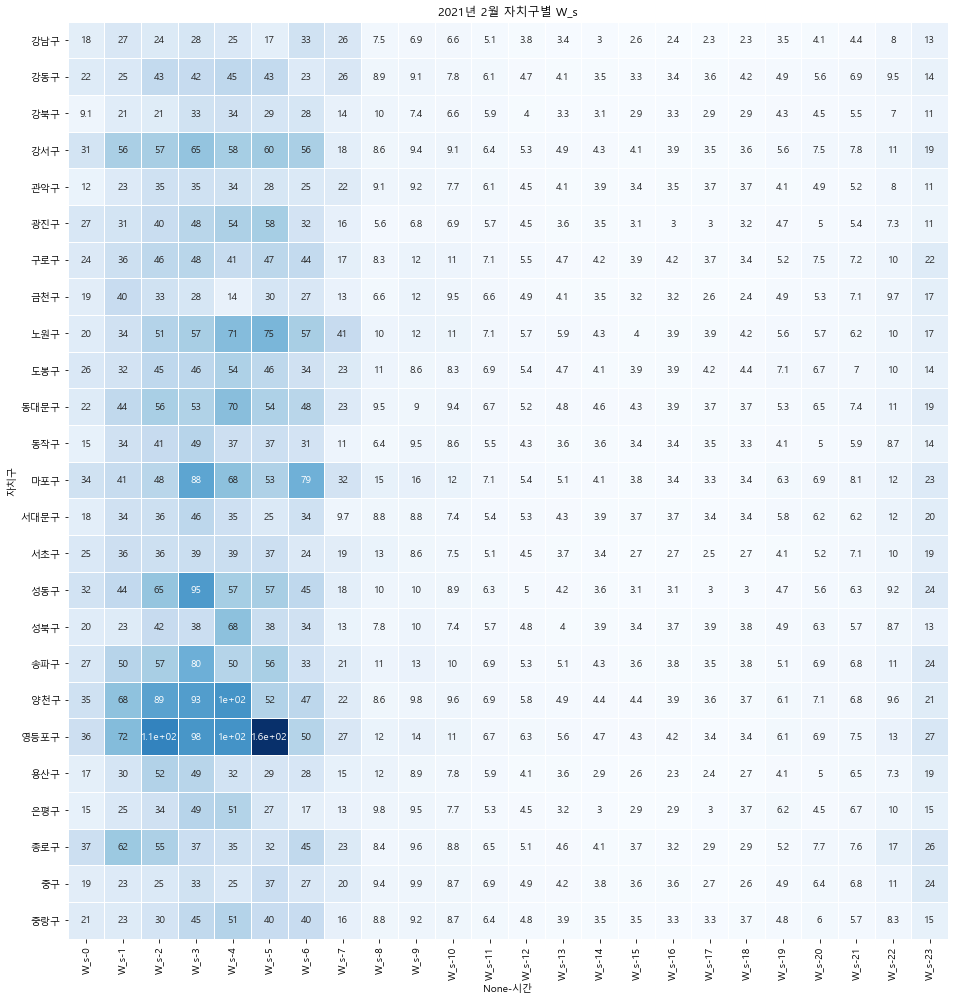

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                           \
시간          0          1          2           3          4           5    
자치구                                                                       
강남구  41.204661  42.424805  42.674264   62.610229  61.569136   49.799697   
강동구  27.491448  32.967705  68.803744   66.353896  94.519529  111.393176   
강북구   9.886203  27.899230  34.922461   45.442941  51.141478   58.180625   
강서구  42.550456  92.157956  84.373829  114.489611  99.628824  147.111207   
관악구  11.529630  34.937859  66.017373   48.652846  43.756682   46.144341   

                                                                      \
시간           6          7          8          9         10        11   
자치구                                                                    
강남구   98.307953  64.457327  13.286432   9.402738  8.157442  6.613707   
강동구   57.430458  60.127110  18.323782  10.928100  8.374336  5.421108   
강북구   52.422853  19.672615  13.135052   8.820396  6.339822  5.985778   
강서구  111.753706  30.859662  19.910814  12.959169  8.235258  5.034838   
관악구   48.263187  42.701324  15.953060   9.831101  7.982229  4.803844   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  4.214514  3.577805  3.262937  2.868270  2.742460  2.601419  2.829851   
강동구  3.805698  3.154225  2.773566  2.488438  2.678933  3.001031  4.407936   
강북구  3.352985  2.626699  2.868045  2.511958  3.023657  2.558149  2.695405   
강서구  3.561768  3.439815  2.812698  2.473870  2.327925  2.268918  2.724610   
관악구  3.390306  2.878420  3.070286  2.555808  2.428596  2.491227  3.022882   

                                                           
시간         19         20         21         22         23  
자치구                                                        
강남구  3.994566   4.452373   4.938795  12.794030  17.825682  
강동구  4.327287   5.178349   8.781569   9.964780  18.023787  
강북구  4.255664   4.426594   6.672068   7.806804  15.461514  
강서구  4.546391  10.892739  10.417386  12.206198  19.330875  
관악구  3.029243   3.864081   5.674307   7.535593   9.116736

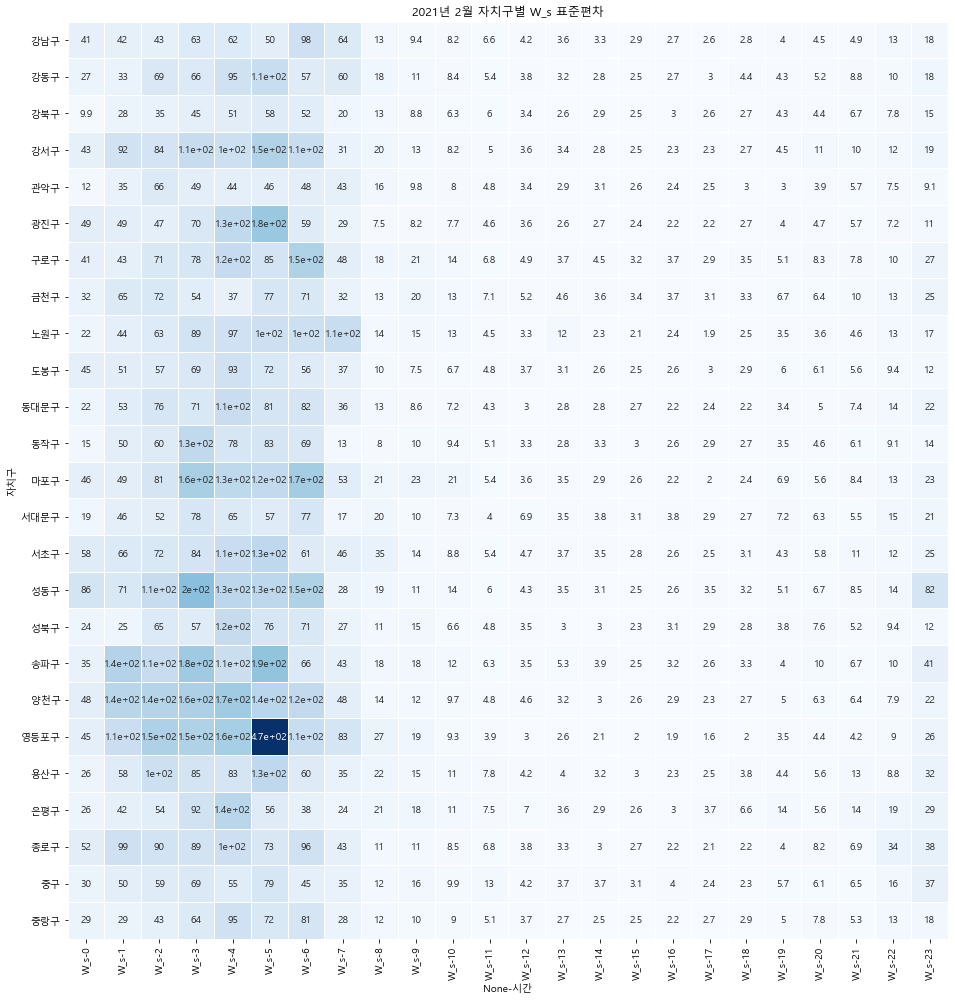

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호??매봉역 3번출구앞
4,3호선 매봉역 3번출구앞
...,...
2277,흑석한강푸르지오(110동)
2278,흥국사 정류장
2279,희성오피앙
2280,희훈타워빌 앞


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['KC 대학교',
 '가락고등학교 앞',
 '가재울 초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '강서초등학교',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (입학정보관)',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '건국대학교 정문 앞',
 '건국대학교 학생회관',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교 버스정류장',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운대학교 중앙도서관',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '묘곡초등학교',
 '문정중학교',
 '문현중고등학교 사이',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학교 옆',
 '상일초등학교',
 '새솔초등학교',
 '서울강월초등학교 앞',
 '서울과학기술대학교(미래관)',
 '서

In [43]:
len(school)

140

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
1800,강서구,KC 대학교,0,0.035714,0.000000,0.00,0.000000,0.0,학교
1801,강서구,KC 대학교,1,0.053571,0.000000,0.00,0.000000,0.0,학교
1802,강서구,KC 대학교,2,0.000000,0.000000,0.00,0.000000,0.0,학교
1803,강서구,KC 대학교,3,0.000000,0.053571,0.00,0.000000,0.0,학교
1804,강서구,KC 대학교,4,0.062500,0.000000,0.00,0.000000,0.0,학교
...,...,...,...,...,...,...,...,...,...
54547,동대문구,휘봉고등학교 앞,19,0.187500,0.178571,1.05,0.512195,5.6,학교
54548,동대문구,휘봉고등학교 앞,20,0.098214,0.089286,1.10,0.523810,11.2,학교
54549,동대문구,휘봉고등학교 앞,21,0.232143,0.071429,3.25,0.764706,14.0,학교
54550,동대문구,휘봉고등학교 앞,22,0.107143,0.017857,6.00,0.857143,56.0,학교


In [45]:
subway

['3호??매봉역 3번출구앞',
 '3호선 매봉역 3번출구앞',
 '419민주묘지역 1번출구',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 '??울역 12번 출구 앞',
 '서울역 12번 출구 앞',
 '?┗藪?번출구',
 '제기역1번출구',
 '?寗뗄?1번 출구 옆',
 '뚝섬역 1번 출구 옆',
 '?移貶?4번출구',
 '녹번역 4번출구',
 '?蹈澍?4번출구',
 '먹골역 4번출구',
 '?된？?10번 출구 앞',
 '천호역 10번 출구 앞',
 '?킬뼁?4번출구',
 '신내역 4번출구',
 '?풔育逃맙?5번출구 뒤',
 '건대입구??5번출구 뒤',
 '건대입구역 5번출구 뒤',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가락시장역 2번 출구',
 '가락시장역 3번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가양역 8번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고덕역 4번출구',
 '고덕역 5번출구',
 '고려대학교 2번출구',
 '고속터미널역 5번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '공덕역 2번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공릉역 1번 출구 앞',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '광나루역 3번 출구',
 '광화문역 1번출구 앞',
 '광화문역 2번출구 앞',
 '광화문역 5번출구',
 '광화문역 6번출구 옆',
 '광화문역 7번출구 앞',
 '광흥창역 2번출구 앞',
 '광흥창역5번출구',

In [46]:
len(subway)

442

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
72,강남구,3호??매봉역 3번출구앞,0,0.000000,0.000000,0.000000,0.0,0.0,지하철
73,강남구,3호??매봉역 3번출구앞,1,0.000000,0.000000,0.000000,0.0,0.0,지하철
74,강남구,3호??매봉역 3번출구앞,2,0.000000,0.000000,0.000000,0.0,0.0,지하철
75,강남구,3호??매봉역 3번출구앞,3,0.000000,0.000000,0.000000,0.0,0.0,지하철
76,강남구,3호??매봉역 3번출구앞,4,0.000000,0.000000,0.000000,0.0,0.0,지하철
...,...,...,...,...,...,...,...,...,...
54643,동작구,흑석역 4번출구,19,0.142857,0.205357,0.695652,0.0,0.0,지하철
54644,동작구,흑석역 4번출구,20,0.080357,0.125000,0.642857,0.0,0.0,지하철
54645,동작구,흑석역 4번출구,21,0.089286,0.107143,0.833333,0.0,0.0,지하철
54646,동작구,흑석역 4번출구,22,0.062500,0.062500,1.000000,0.0,0.0,지하철


In [48]:
apart

['?팃台?휴먼시아 아파트 옆',
 '아차산 휴먼시아 아파트 옆',
 'DMC센트럴아이파크아파트',
 'DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '가락삼환아파트 앞',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강동리버스트4단지아파트 404동 앞',
 '강동리버스트4단지아파트 405동 앞',
 '강변아파트 310동 앞',
 '개봉아이파크아파트 앞',
 '개봉푸르지오아파트 상가',
 '개포1단지아파트 입구 (보도육교)',
 '개포래미안포레스트아파트 107동 앞',
 '건영아파트 앞',
 '건영아파트앞 사거리',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10??앞 )',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '그랜드아이파크아파트 앞',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길성그랑프리텔아파트',
 '길음뉴타운푸르지오아파트 3단지',
 '길음래미안아파트817동 상가 앞',
 '낙성대 교수아파트',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '답십리 래미안엘파인아파트 입구',
 '답십리파크자이아파트 앞',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '도봉한신아파트 주변',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동신아파트 104동 앞',
 '두산대림아파트 삼거리',
 '두산위브아파트 옆 상가건물 앞',
 '둔촌신성미소

In [49]:
len(apart)

207

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
840,광진구,?팃台?휴먼시아 아파트 옆,0,0.000000,0.000000,0.000000,0.000000,0.000000,아파트
841,광진구,?팃台?휴먼시아 아파트 옆,1,0.000000,0.000000,0.000000,0.000000,0.000000,아파트
842,광진구,?팃台?휴먼시아 아파트 옆,2,0.000000,0.000000,0.000000,0.000000,0.000000,아파트
843,광진구,?팃台?휴먼시아 아파트 옆,3,0.000000,0.000000,0.000000,0.000000,0.000000,아파트
844,광진구,?팃台?휴먼시아 아파트 옆,4,0.000000,0.000000,0.000000,0.000000,0.000000,아파트
...,...,...,...,...,...,...,...,...,...
54475,동대문구,휘경sk뷰아파트 앞,19,0.214286,0.133929,1.600000,0.615385,7.466667,아파트
54476,동대문구,휘경sk뷰아파트 앞,20,0.330357,0.142857,2.312500,0.698113,7.000000,아파트
54477,동대문구,휘경sk뷰아파트 앞,21,0.107143,0.107143,1.000000,0.500000,9.333333,아파트
54478,동대문구,휘경sk뷰아파트 앞,22,0.142857,0.053571,2.666667,0.727273,18.666667,아파트


In [51]:
park

['?羚至? 공원',
 '사평리 공원',
 '가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '국립중앙박물관 -용산가족공원 앞',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '낙성대공원',
 '남산공원 야외식물원 앞',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오피스텔 건너편 소공원',
 '뒷벌공원 옆',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마곡문화공원',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정근린공원2',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '삼성도로공원',
 '삼청공원 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '서소문역사공원',
 '석촌호수교차로 (송파나루근린공원 앞)',
 '섬들근린공원',
 '세종로공원',
 '솔밭공원역',
 '송이공원',
 '신내능말공원',
 '신내어울공원 앞',


In [52]:
len(park)

114

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
1008,서초구,?羚至? 공원,0,0.000000,0.000000,0.000000,0.000000,0.000000,공원
1009,서초구,?羚至? 공원,1,0.000000,0.000000,0.000000,0.000000,0.000000,공원
1010,서초구,?羚至? 공원,2,0.000000,0.000000,0.000000,0.000000,0.000000,공원
1011,서초구,?羚至? 공원,3,0.000000,0.000000,0.000000,0.000000,0.000000,공원
1012,서초구,?羚至? 공원,4,0.000000,0.000000,0.000000,0.000000,0.000000,공원
...,...,...,...,...,...,...,...,...,...
54379,중구,훈련원공원주차장 앞,19,0.294643,0.276786,1.064516,1.041653,5.475806,공원
54380,중구,훈련원공원주차장 앞,20,0.232143,0.267857,0.866667,0.904924,5.466667,공원
54381,중구,훈련원공원주차장 앞,21,0.348214,0.241071,1.444444,1.239782,6.599327,공원
54382,중구,훈련원공원주차장 앞,22,0.160714,0.223214,0.720000,0.784846,6.355349,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.035714,0.000000,0.000000,0.000000,0.000000,학교
1,강서구,KC 대학교,1,0.053571,0.000000,0.000000,0.000000,0.000000,학교
2,강서구,KC 대학교,2,0.000000,0.000000,0.000000,0.000000,0.000000,학교
3,강서구,KC 대학교,3,0.000000,0.053571,0.000000,0.000000,0.000000,학교
4,강서구,KC 대학교,4,0.062500,0.000000,0.000000,0.000000,0.000000,학교
...,...,...,...,...,...,...,...,...,...
21667,중구,훈련원공원주차장 앞,19,0.294643,0.276786,1.064516,1.041653,5.475806,공원
21668,중구,훈련원공원주차장 앞,20,0.232143,0.267857,0.866667,0.904924,5.466667,공원
21669,중구,훈련원공원주차장 앞,21,0.348214,0.241071,1.444444,1.239782,6.599327,공원
21670,중구,훈련원공원주차장 앞,22,0.160714,0.223214,0.720000,0.784846,6.355349,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.074405  0.053728  0.034383  0.018484  0.016134  0.019815  0.043938   
아파트  0.086051  0.058963  0.033644  0.022990  0.016908  0.015528  0.021049   
지하철  0.106597  0.079408  0.057086  0.036603  0.026685  0.043027  0.089872   
학교   0.064222  0.047385  0.033099  0.024617  0.014477  0.011990  0.017602   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.076989  0.181626  0.123669  0.114427  0.141447  0.200188  0.243734   
아파트  0.053701  0.119910  0.093038  0.090493  0.127717  0.174560  0.204624   
지하철  0.177763  0.310803  0.225760  0.204650  0.256161  0.322519  0.378697   
학교   0.046492  0.122768  0.100191  0.092538  0.102615  0.155038  0.172895   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.279762  0.353540  0.402491  0.443061  0.476425  0.322447  0.249060   
아파트  0.220885  0.264752  0.314096  0.371679  0.453632  0.329667  0.251510   
지하철  0.420047  0.498849  0.577367  0.686349  0.736062  0.475093  0.344336   
학교   0.191263  0.228125  0.275574  0.302232  0.344898  0.244133  0.189732   

                                   
시간         21        22        23  
특성                                 
공원   0.265899  0.196898  0.126018  
아파트  0.285197  0.213423  0.126553  
지하철  0.331084  0.256161  0.156311  
학교   0.198469  0.157717  0.107844

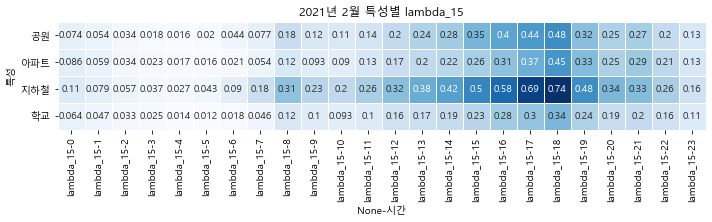

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.080280  0.060870  0.047264  0.025246  0.028257  0.044978  0.063114   
아파트  0.077688  0.058129  0.037215  0.030479  0.023340  0.028124  0.036399   
지하철  0.115239  0.082861  0.061209  0.042601  0.036720  0.070754  0.135256   
학교   0.065295  0.060432  0.051514  0.037712  0.024174  0.024558  0.037438   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.166778  0.272098  0.157021  0.114850  0.131618  0.182309  0.248789   
아파트  0.100775  0.263505  0.109151  0.093603  0.124021  0.159498  0.194627   
지하철  0.249484  0.376913  0.229515  0.186767  0.229646  0.299490  0.372492   
학교   0.067068  0.163208  0.125486  0.101424  0.103464  0.152022  0.179887   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.325051  0.439516  0.473215  0.450217  0.425413  0.283828  0.231136   
아파트  0.236021  0.299138  0.359125  0.376447  0.387955  0.267204  0.192556   
지하철  0.458076  0.603828  0.785086  0.884697  0.816324  0.508742  0.403021   
학교   0.238598  0.346667  0.391163  0.420536  0.388654  0.244950  0.194908   

                                   
시간         21        22        23  
특성                                 
공원   0.246000  0.192517  0.117565  
아파트  0.250236  0.175716  0.110135  
지하철  0.401200  0.333434  0.214857  
학교   0.183336  0.169108  0.111415

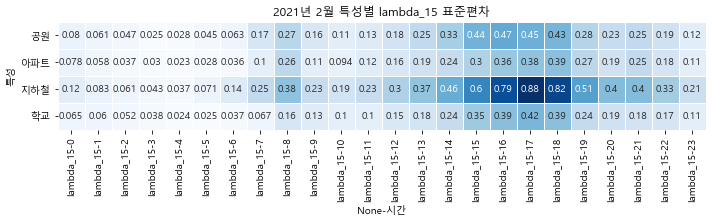

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.063518  0.042528  0.023810  0.014803  0.015977  0.037124  0.048481   
아파트  0.059826  0.045117  0.028770  0.021653  0.018030  0.037440  0.067417   
지하철  0.105729  0.071913  0.050481  0.035593  0.025008  0.024665  0.050299   
학교   0.051977  0.034630  0.023278  0.016901  0.013967  0.023406  0.047832   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.135025  0.217967  0.161497  0.150768  0.189850  0.238957  0.290570   
아파트  0.167443  0.263759  0.167357  0.158126  0.185559  0.222999  0.257160   
지하철  0.141383  0.321651  0.218366  0.195520  0.270705  0.329549  0.396089   
학교   0.117219  0.191071  0.129656  0.125000  0.145472  0.188712  0.209120   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.346256  0.384164  0.413456  0.408521  0.392857  0.264724  0.219768   
아파트  0.280668  0.299388  0.317245  0.321127  0.322464  0.215882  0.200009   
지하철  0.458367  0.525856  0.560662  0.610658  0.667461  0.465397  0.380070   
학교   0.235140  0.260013  0.282526  0.290051  0.249362  0.178380  0.152232   

                                   
시간         21        22        23  
특성                                 
공원   0.202538  0.145833  0.092654  
아파트  0.191123  0.130478  0.075742  
지하철  0.372132  0.254141  0.140878  
학교   0.145855  0.113329  0.064732

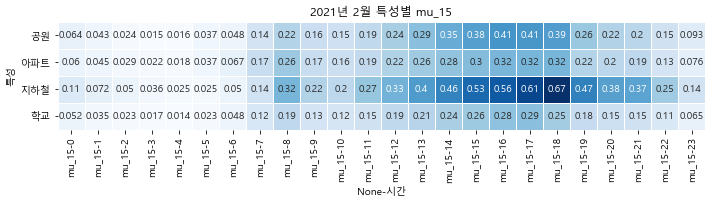

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.067902  0.058220  0.026948  0.019476  0.033481  0.058550  0.069343   
아파트  0.053706  0.045299  0.035539  0.033573  0.031622  0.054589  0.079911   
지하철  0.107430  0.077075  0.057201  0.047130  0.035670  0.035491  0.062070   
학교   0.055084  0.037614  0.023773  0.023506  0.028239  0.041139  0.070630   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.141014  0.236797  0.150132  0.136735  0.153664  0.207479  0.269066   
아파트  0.168304  0.249921  0.133965  0.121465  0.159876  0.164556  0.208007   
지하철  0.184803  0.371243  0.204206  0.156928  0.221778  0.284467  0.387142   
학교   0.128081  0.206580  0.118719  0.109578  0.120717  0.152614  0.178530   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.379056  0.426306  0.435837  0.402070  0.363906  0.239175  0.200011   
아파트  0.255853  0.302722  0.316219  0.311280  0.313092  0.174763  0.172836   
지하철  0.515721  0.620816  0.692800  0.693925  0.662130  0.482718  0.399701   
학교   0.222448  0.352319  0.337899  0.309805  0.252687  0.182153  0.167153   

                                   
시간         21        22        23  
특성                                 
공원   0.180330  0.127965  0.085717  
아파트  0.167184  0.116207  0.064648  
지하철  0.385250  0.273227  0.151963  
학교   0.174243  0.110292  0.063154

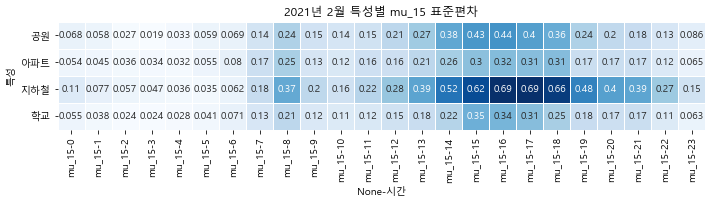

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.259417  1.483269  1.521711  0.793479  0.610775  0.439618  1.102975   
아파트  1.679688  1.738949  1.326874  0.832943  0.721466  0.519915  0.477948   
지하철  1.118759  1.278738  1.292827  1.229951  0.953405  1.407749  2.622052   
학교   1.304006  1.421860  1.251953  1.075775  0.645082  0.527117  0.346324   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.148034  1.526962  1.239964  0.905567  0.842996  0.871863  0.798130   
아파트  0.495869  0.556751  0.651302  0.545269  0.673789  0.728552  0.757171   
지하철  1.897326  1.275535  1.243044  1.103775  0.934441  0.940320  0.931648   
학교   1.002387  1.267562  1.775511  1.089205  0.824925  0.841591  0.943992   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.828043  0.896743  0.944088  1.115921  1.400751  1.272062  1.253312   
아파트  0.739175  0.822039  0.926246  1.158833  1.763261  1.705000  1.449974   
지하철  0.897471  0.901390  0.960861  1.077834  1.104313  1.093087  0.982519   
학교   0.816870  0.895181  0.956981  1.033059  1.563211  1.570457  1.510713   

                                   
시간         21        22        23  
특성                                 
공원   1.474199  1.553217  1.379154  
아파트  1.659674  2.038614  1.905611  
지하철  1.000317  1.079735  1.163436  
학교   1.835574  1.687826  1.926811

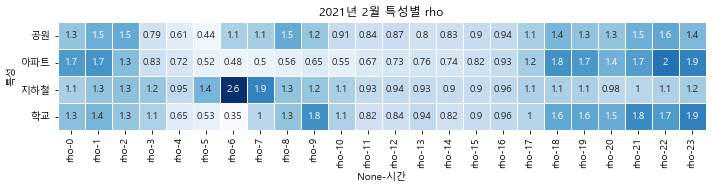

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.076065  1.228177  1.095141  0.765624  0.525469  0.369993  0.759433   
아파트  1.081797  1.018477  0.904284  0.675986  0.683972  0.371455  0.383001   
지하철  1.478963  1.729855  1.546226  1.552786  1.328024  1.621222  1.690340   
학교   0.632061  0.701772  0.678598  0.565533  0.242757  0.244139  0.304004   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.674559  0.897606  0.747543  0.796999  0.752750  0.828668  0.853151   
아파트  0.384273  0.441107  0.523313  0.533422  0.649825  0.724592  0.745573   
지하철  1.797198  1.561615  1.659984  1.659100  1.515939  1.555968  1.471821   
학교   0.389047  0.493086  0.483065  0.550677  0.479126  0.615988  0.598492   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.815093  0.984430  1.014342  1.134888  1.221254  1.160067  1.067231   
아파트  0.728711  0.809065  0.880192  0.997067  1.111269  1.168942  1.010026   
지하철  1.391936  1.501545  1.700129  1.830687  1.785364  1.610576  1.420648   
학교   0.597426  0.609392  0.681867  0.722080  0.837469  0.818180  0.781069   

                                   
시간         21        22        23  
특성                                 
공원   1.209087  1.238829  1.243377  
아파트  1.153203  1.192163  1.206604  
지하철  1.356576  1.515419  1.648280  
학교   0.767340  0.814133  0.884066

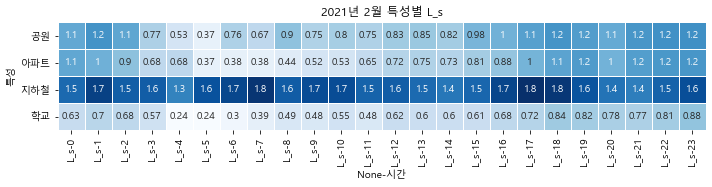

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.471067  1.726854  1.754226  1.386713  1.108545  1.155426  1.615033   
아파트  1.446468  1.366053  1.399065  0.990728  1.175549  0.719902  0.823773   
지하철  2.550042  2.887147  2.873166  3.414370  2.903791  3.734775  2.588627   
학교   0.853458  1.264513  1.171617  1.226328  0.537637  0.795091  0.935696   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.356292  1.639017  1.159036  1.086682  0.977394  0.915342  0.953924   
아파트  0.789760  0.825909  0.718438  0.625467  0.767051  0.854683  0.836043   
지하철  3.149898  2.838064  2.894110  2.781096  2.173769  2.176658  1.781776   
학교   0.869848  0.873721  0.710631  1.030793  0.657595  0.987251  0.905440   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.875785  1.139103  1.188357  1.331029  1.556581  1.435739  1.302856   
아파트  0.789477  0.860119  1.047543  1.206630  1.335966  1.394149  1.043726   
지하철  1.528744  2.030714  2.822049  3.118441  3.160539  2.903776  2.808893   
학교   0.951196  0.856425  1.028884  1.185694  1.321852  1.208062  1.158656   

                                   
시간         21        22        23  
특성                                 
공원   1.471417  1.527903  1.475548  
아파트  1.380213  1.421949  1.496417  
지하철  2.889132  2.998681  3.140850  
학교   1.007553  1.260819  1.346040

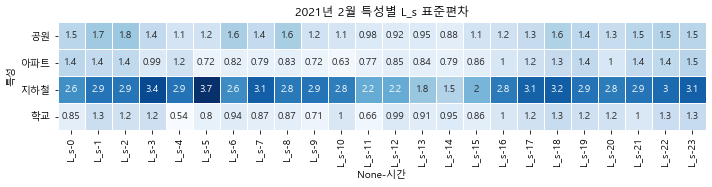

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
특성                                                                      
공원   23.953002  47.671408  64.259626  52.296636  42.823776  25.147566   
아파트  29.964968  43.706950  60.779665  47.743539  53.939142  29.715936   
지하철  23.802099  44.939234  52.111263  81.592143  77.753255  90.259221   
학교   17.940286  30.737273  38.515854  40.930680  23.359509  25.572750   

                                                                      \
시간          6          7          8          9          10        11   
특성                                                                     
공원   35.244975  26.524145  10.271972   9.301453   8.766912  5.697245   
아파트  18.964799   9.434408   5.424007   7.923997   6.704493  5.904702   
지하철  65.784898  29.320547  10.220371  10.599754  10.226225  7.149588   
학교   22.240386  16.900300   9.537551   8.120210   7.766370  5.921455   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   4.580565  3.946795  3.507856  3.198765  3.154776  3.182544  3.480883   
아파트  4.703665  4.036746  4.047594  3.772418  3.623162  3.827690  4.032147   
지하철  5.798135  4.755295  4.174987  3.679719  3.603995  3.336630  3.073587   
학교   4.461755  4.527341  3.581844  3.401320  3.220531  3.120818  3.856876   

                                                         
시간         19        20        21         22         23  
특성                                                       
공원   4.862449  5.810715  7.137393  10.130714  16.611196  
아파트  6.108250  6.040779  7.008093  11.528602  19.754187  
지하철  4.422394  5.397964  5.645922   8.535632  15.735572  
학교   5.234191  6.809063  7.752319   9.950915  18.767850

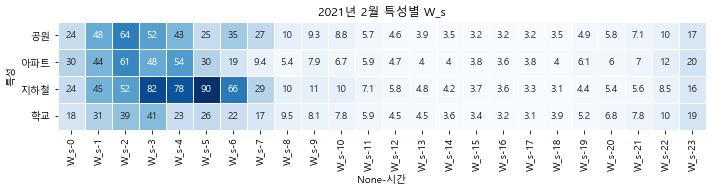

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                             \
시간          0          1           2           3           4           5    
특성                                                                          
공원   39.254455  70.985347  103.851269   98.629907  103.903504   76.387489   
아파트  56.693017  78.460895   95.994392   75.865590   91.082583   64.728967   
지하철  34.927171  99.272838   76.132644  161.825704  135.674616  263.613540   
학교   25.359110  48.683373   57.925016   78.545240   50.841773   87.998399   

                                                                       \
시간           6          7          8          9          10        11   
특성                                                                      
공원    66.006790  95.306610  19.164140  11.797972  12.294302  4.978083   
아파트   41.691090  22.859545  10.383435  13.131875   6.595176  5.294067   
지하철  128.317340  52.107535  14.926587  10.352244   8.311781  5.499850   
학교    82.620573  48.583439  23.561486  12.908982  12.452197  7.063861   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   3.567775  3.147976  3.370275  2.552124  2.782657  2.559822  3.119092   
아파트  3.864109  3.108188  3.907331  2.990466  2.780914  3.197240  3.533682   
지하철  4.319327  2.948720  2.623501  2.153317  2.321653  1.957452  1.992616   
학교   4.478766  9.749569  3.374129  3.071139  3.037198  2.965699  4.166044   

                                                           
시간         19         20         21         22         23  
특성                                                         
공원   4.510332   5.261222   7.827734  12.712134  19.309749  
아파트  6.397459   5.075801   6.841407  14.739263  21.188168  
지하철  3.256532   4.172872   6.655827   8.392873  16.138297  
학교   5.189900  10.931965  10.521088  11.727295  25.901017

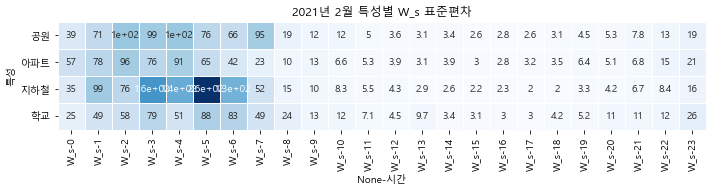

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 2월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()